# Question 1: Data Exploration

### I) Descriptive Statistics

In [91]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [38]:
# 1 - reading csv file and printing first 5 rows
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [39]:
# 2 - number of rows and columns
print("Number of rows in df:", df.shape[0])
print("Number of columns in df:", df.shape[1])

Number of rows in df: 788
Number of columns in df: 9


In [40]:
# 3 - calculating min, max, mean and std of the "Age" column
min = df["Age"].min()
max = df["Age"].max()
mean = df["Age"].mean()
std = df["Age"].std()

print("The min value in Age is:", min)
print("The max value in Age is:", max)
print("The mean value in Age is:", mean)
print("The std value in Age is:", std)

The min value in Age is: 12
The max value in Age is: 81
The mean value in Age is: 33.21573604060914
The std value in Age is: 11.819874550957666


In [41]:
# 4 - calculating the mode of the "Age" column
mode = df["Age"].mode()[0]
print("Mode of Age:", mode)


Mode of Age: 22


The modality of the "Age" column is Unimodal because one number has the highest occurences which is 22.

In [42]:
# 5 - calculating first and third quartile (and second)
q1 = df["Age"].quantile(.25)
q2 = df["Age"].quantile(.5)
q3 = df["Age"].quantile(.75)

print("The first quartile is", q1)
print("The third quartile is", q3)


The first quartile is 24.0
The third quartile is 41.0


In [43]:
# 6 - calculating interquartile range
q1 = df["Age"].quantile(.25)
q3 = df["Age"].quantile(.75)
iqr = q3-q1
print("The interquartile range is:", iqr)

The interquartile range is: 17.0


In [44]:
# 7 - Five Number Summary of Age
print("The Five Number Summary of 'Age'\n")
print("Min:", min)
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("Max:", max)


The Five Number Summary of 'Age'

Min: 12
Q1: 24.0
Q2: 29.0
Q3: 41.0
Max: 81


### II) Data Visualisation

<AxesSubplot:>

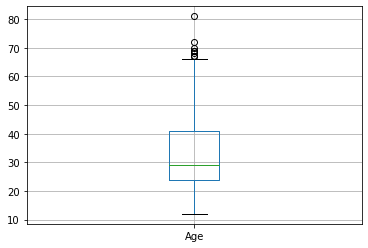

In [45]:
# 1 - boxplot of Age
df.boxplot("Age")

<AxesSubplot:title={'center':'Age'}, xlabel='Outcome'>

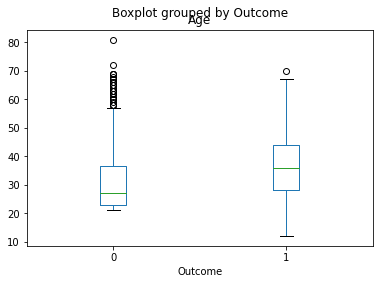

In [46]:
# 2 -  boxplot of the ‘Age’ column of the diabetic and no-diabetic groups side by side.
df.boxplot("Age", by="Outcome", grid=False)

3 - Analysis of the relationship between the patient's age and being diabetic

...


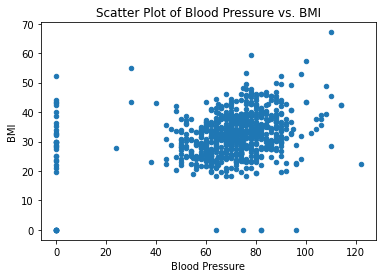

In [47]:
# 4 - scatter plot with the patients Blood Pressure on the x-axis and BMI on the y-axis 
df.plot.scatter(x="BloodPressure", y="BMI")

plt.xlabel("Blood Pressure")
plt.ylabel("BMI")

plt.title("Scatter Plot of Blood Pressure vs. BMI")

plt.show()

In [48]:
# 5 - scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on 
# the y-axis, highlighting diabetic patients with different colours. The colouring label should be
# ‘diabetic’: yes and no.

# creating df conatining just diabetics (Outcome = 1) and nondiabetics (Outcome = 0)
diabetic = df[df["Outcome"] == 1]
nondiabetic = df[df["Outcome"] == 0]

diabetic.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
2,8,183,64.0,0,0,23.3,0.672,32,1
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1


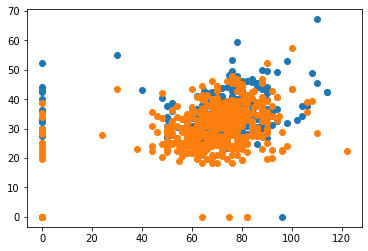

In [49]:
# scatter plot
plt.scatter(diabetic["BloodPressure"], diabetic["BMI"])
plt.scatter(nondiabetic["BloodPressure"], nondiabetic["BMI"])
plt.show()

6 - Analysis of the scatterplot in question 5, the relationship between BMI/Blood pressure and diabetes.


### III) Data Filtering

In [50]:
# 1 - getting all patients with Insulin more than 400
insulin_gt400 = df.loc[df["Insulin"] > 400]
insulin_gt400.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
111,8,155,62.0,26,495,34.0,0.543,46,1
153,1,153,82.0,42,485,40.6,0.687,23,0
186,8,181,68.0,36,495,30.1,0.615,60,1


In [51]:
# calculating how many patients are diabetic/non-diabetic
print("Diabetic:", len(insulin_gt400[insulin_gt400["Outcome"] == 1]))
print("Non diabteic:", len(insulin_gt400[insulin_gt400["Outcome"] == 0]))


Diabetic: 12
Non diabteic: 8


In [52]:
# 2 - getting patients with Insulin greater than 400 and Glucose greater than 175. 
insulin_glucose = df.loc[(df["Insulin"] > 400) & (df["Glucose"] > 175)]
insulin_glucose


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
186,8,181,68.0,36,495,30.1,0.615,60,1
220,0,177,60.0,29,478,34.6,1.072,21,1
228,4,197,70.0,39,744,36.7,2.329,31,0
753,0,181,88.0,44,510,43.3,0.222,26,1


In [53]:
# calculating how many diabetic and non diabetic
print("Diabetic:", len(insulin_glucose[insulin_glucose["Outcome"] == 1]))
print("Non diabteic:", len(insulin_glucose[insulin_glucose["Outcome"] == 0]))


Diabetic: 5
Non diabteic: 1


In [54]:
# 3 -  finding average Glucose level of a patient with more than 5 pregnancies and older than 45
pregnant_45 = df.loc[(df["Pregnancies"] > 5) & (df["Age"] > 45)]
pregnant_45


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
9,8,125,96.0,0,0,0.0,0.232,54,1
12,10,139,80.0,0,0,27.1,1.441,57,0
21,8,99,84.0,0,0,35.4,0.388,50,0
24,11,143,94.0,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
745,12,100,84.0,33,105,30.0,0.488,46,0
749,6,162,62.0,0,0,24.3,0.178,50,1
759,6,190,92.0,0,0,35.5,0.278,66,1
763,10,101,76.0,48,180,32.9,0.171,63,0


In [55]:
# calculating average
avg_preg45 = pregnant_45["Glucose"].mean()
print("The average Glucose level of a patient with more than 5 pregnancies and older than 45 is:", avg_preg45)

The average Glucose level of a patient with more than 5 pregnancies and older than 45 is: 135.36986301369862


In [56]:
# 4 - distinct values in the Pregnancies column
len(df["Pregnancies"].unique())

17

In [57]:
# 5 -  distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-diabetic of each value
pregnancies = df.groupby("Pregnancies")["Outcome"]
value_counts = pregnancies.value_counts(normalize = True)
perc = value_counts.unstack().fillna(0)
perc

Outcome,0,1
Pregnancies,,
0,0.660714,0.339286
1,0.773050,0.226950
2,0.824074,0.175926
3,0.644737,0.355263
4,0.666667,0.333333
5,0.637931,0.362069
6,0.680000,0.320000
7,0.434783,0.565217
8,0.450000,0.550000


# Question 2: Data Cleaning

### I) Duplicated Removal

In [58]:
# 1 - identifying duplicated records
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool

In [59]:
# 2 - remove duplicates
# df2 is the new df without duplicates
df2 = df.drop_duplicates(keep=False)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33,0
763,10,101,76.0,48,180,32.9,0.171,63,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


In [62]:
# 3 - finding rows and columns
print("Number of rows in df:", df2.shape[0])
print("Number of columns in df:", df2.shape[1])

Number of rows in df: 748
Number of columns in df: 9


In [67]:
# 4 - finding how many duplicated rows before duplicates were removed
duplicate_rows_count = df.duplicated().sum()
print("There was", duplicate_rows_count, "duplicate rows")

There was 20 duplicate rows


### II) Missing Values

In [74]:
# 1 - finding missing values in the "blood pressure" column
bloodpressure_missing = df2["BloodPressure"].isna().sum()
print("The number of missing values in BloodPressure are:", bloodpressure_missing)

The number of missing values in BloodPressure are: 23


In [79]:
# 2 - remove the missing records in the "BloodPressure" column
df2 = df2.dropna()

In [80]:
# 3 - new df with specific columns called df3
df3 = df2.filter(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], axis=1)
df3


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,8,183,64.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,15
...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33
763,10,101,76.0,48,180,32.9,0.171,63
765,5,121,72.0,23,112,26.2,0.245,30
766,1,126,60.0,0,0,30.1,0.349,47


In [81]:
# 4 - 
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test = train_test_split(df3, test_size=0.10, random_state=50)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,107,74.0,0,0,29.6,0.254,31
626,0,125,68.0,0,0,24.7,0.206,21
82,7,83,78.0,26,71,29.3,0.767,36
424,8,151,78.0,32,210,42.9,0.516,36
573,2,98,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,83,65.0,28,66,36.8,0.629,24
218,5,85,74.0,22,0,29.0,1.224,32
443,8,108,70.0,0,0,30.5,0.955,33
381,0,105,68.0,22,0,20.0,0.236,22


In [86]:
# 5 -
#creating a copy for questions later
X_test2 = X_test.copy()

In [92]:
X_test2["Glucose"] = np.NaN
X_test2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
17,7,NaN,74.0,0,0,29.6,0.254,31
626,0,NaN,68.0,0,0,24.7,0.206,21
82,7,NaN,78.0,26,71,29.3,0.767,36
424,8,NaN,78.0,32,210,42.9,0.516,36
573,2,NaN,60.0,17,120,34.7,0.198,22
...,...,...,...,...,...,...,...,...
490,2,NaN,65.0,28,66,36.8,0.629,24
218,5,NaN,74.0,22,0,29.0,1.224,32
443,8,NaN,70.0,0,0,30.5,0.955,33
381,0,NaN,68.0,22,0,20.0,0.236,22


In [94]:
# 6 - mean glucose
mean_glucose = X_train["Glucose"].mean()
mean_glucose

121.2638036809816

In [95]:
X_test2["Glucose"] = mean_glucose
